<a href="https://colab.research.google.com/github/fatasa/TeksMining/blob/main/TM_PraktikumPertemuan14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def load_data():
  data = pd.read_excel('dataset_kotor.xlsx')
  return data

In [3]:
tweet_df = load_data()

In [4]:
tweet_df.head()

,no,description,label
0,1,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,negatif
1,2,Abahboss ni mula dah balik share dakyah2 pro t...,negatif
2,3,"Abis dapet jdwal vaksin dosis 3, terus baca ba...",negatif
3,4,@Boediantar4 abis di vaksin sinovac asal china...,negatif
4,5,@agussari AC katanya. Kalau mau pake AC harus ...,negatif


In [5]:
df = pd.DataFrame(tweet_df[['label','description']]);

In [6]:
df.head()

,label,description
0,negatif,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...
1,negatif,Abahboss ni mula dah balik share dakyah2 pro t...
2,negatif,"Abis dapet jdwal vaksin dosis 3, terus baca ba..."
3,negatif,@Boediantar4 abis di vaksin sinovac asal china...
4,negatif,@agussari AC katanya. Kalau mau pake AC harus ...


In [7]:
df.shape

(5877, 2)

In [8]:
df['label'].value_counts()

netral     2006
positif    1939
negatif    1932
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset labels distribuition')

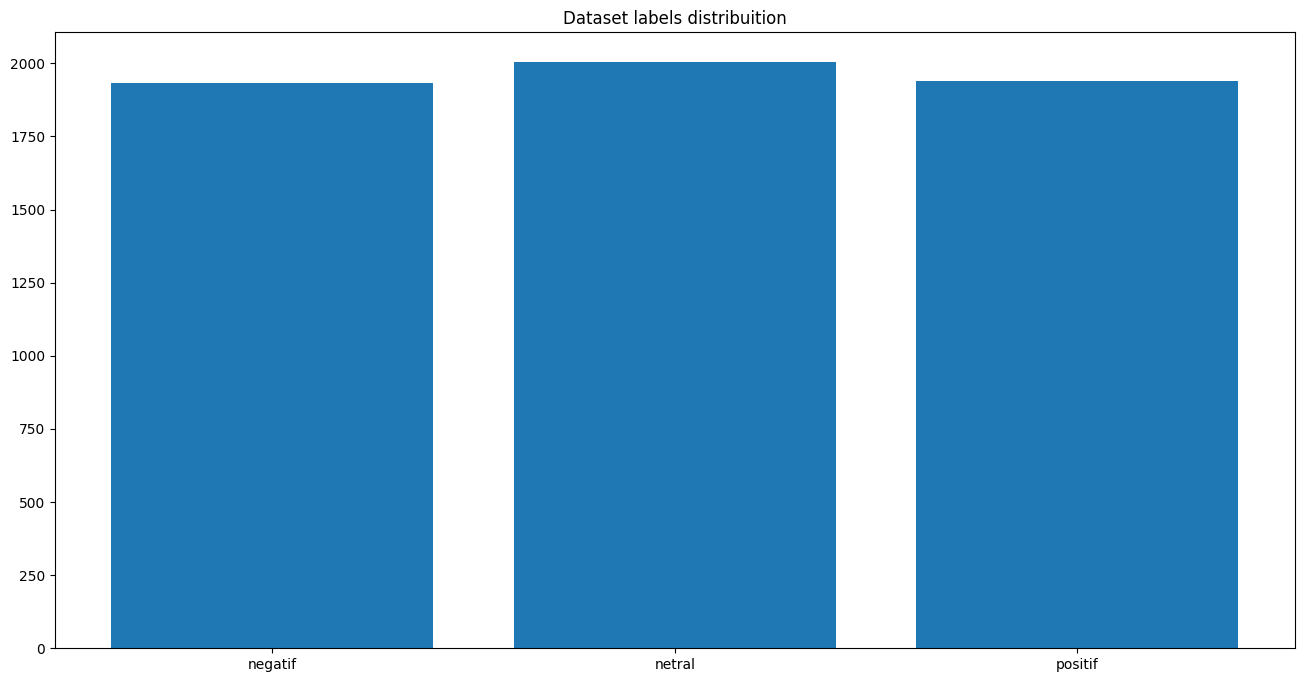

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

label_cnt = Counter(df.label)
plt.figure(figsize=(16,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset labels distribuition")

In [10]:
#Mengubah text menjadi lowercase
df['lower'] = df['description'].str.lower()

In [11]:
df.head()

,label,description,lower
0,negatif,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...
1,negatif,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...
2,negatif,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba..."
3,negatif,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...
4,negatif,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...


In [12]:
import re # impor modul regular expression
def hapus_angka(tweet):
    tweet = re.sub(r"\d+", "", tweet)
    return tweet

In [13]:
df['h_angka']=df['lower'].apply(lambda x: hapus_angka(x))

In [14]:
df.head()

,label,description,lower,h_angka
0,negatif,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...
1,negatif,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah pro te...
2,negatif,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis , terus baca bac..."
3,negatif,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...,@boediantar abis di vaksin sinovac asal china ...
4,negatif,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...,@agussari ac katanya. kalau mau pake ac harus ...


In [15]:
#import stopword
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

In [16]:
# all
emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',
                       '😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',
                       '😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',
                       '😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',
                       '☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',
                       '😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',
                       '🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',
                       '👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','🤝',
                       '👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',
                       '💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',
                       '🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',
                       '👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',
                       '💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',
                       '🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',
                       '🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',
                       '📉','🗒','🗓'])
# sad happy
emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',
                     ': NS)','8)',':HAI','@',':HAI)',':‑)',
                     ':P',':@','8‑D',':‑)',':-&','=D',':‑p',
                     '=‑D','XD',':D',':-))','%-)',':}',
                     ':c)',':^)',':C','>:3',':>','L',':-/','>:/',
                     ':S','>:[','@',':-(','"["',':-<',
                     '=\\','=/','>:(',':',':{','>:\\',
                     '(',':','(", ")',':','("',':-c',
                     '> :(',':‑',':NS('])
# all emot happy + sad
emoticons = emoticons_phone.union(emoticons_sad_happy)


def fulltext(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    #remove coma
    tweet = re.sub(r',','',tweet)
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False,
    strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
            word not in emoticons and # remove emoticons
            word not in string.punctuation): # remove punctuation
    #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

In [17]:
df['token'] = df['h_angka'].apply(lambda x: fulltext(x))

In [18]:
df.head()

,label,description,lower,h_angka,token
0,negatif,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...,"[aamiin, maaf, utk, depan, tolong, pikir, krit..."
1,negatif,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah pro te...,"[abahboss, ni, dah, share, dakyah, pro, teori,..."
2,negatif,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis , terus baca bac...","[abis, dapet, jdwal, vaksin, dosis, baca, baca..."
3,negatif,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...,@boediantar abis di vaksin sinovac asal china ...,"[abis, vaksin, sinovac, china, warga, yg, ting..."
4,negatif,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...,@agussari ac katanya. kalau mau pake ac harus ...,"[ac, pake, ac, bayar, antigen, pcr, ac, loh, ,..."


In [19]:
#remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

In [20]:
#simpan di kolom tabel baru tweet
df['fulltext'] = df['token'].apply(lambda x: remove_punct(x))

In [21]:
df.head()

,label,description,lower,h_angka,token,fulltext
0,negatif,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...,"[aamiin, maaf, utk, depan, tolong, pikir, krit...",aamiin maaf utk depan tolong pikir kritis covi...
1,negatif,Abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah2 pro t...,abahboss ni mula dah balik share dakyah pro te...,"[abahboss, ni, dah, share, dakyah, pro, teori,...",abahboss ni dah share dakyah pro teori konspir...
2,negatif,"Abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis 3, terus baca ba...","abis dapet jdwal vaksin dosis , terus baca bac...","[abis, dapet, jdwal, vaksin, dosis, baca, baca...",abis dapet jdwal vaksin dosis baca baca testi ...
3,negatif,@Boediantar4 abis di vaksin sinovac asal china...,@boediantar4 abis di vaksin sinovac asal china...,@boediantar abis di vaksin sinovac asal china ...,"[abis, vaksin, sinovac, china, warga, yg, ting...",abis vaksin sinovac china warga yg tinggal dun...
4,negatif,@agussari AC katanya. Kalau mau pake AC harus ...,@agussari ac katanya. kalau mau pake ac harus ...,@agussari ac katanya. kalau mau pake ac harus ...,"[ac, pake, ac, bayar, antigen, pcr, ac, loh, ,...",ac pake ac bayar antigen pcr ac loh pasar raky...


In [22]:
#Mengurutkan ascending urutkan kolom tweet
df.sort_values("fulltext", inplace = True)

In [23]:
df.head()

,label,description,lower,h_angka,token,fulltext
134,negatif,&lt;-- bener2 udah kaya mba2 marketing JAKI ny...,&lt;-- bener2 udah kaya mba2 marketing jaki ny...,&lt;-- bener udah kaya mba marketing jaki nyur...,"[--, bener, udah, kaya, mba, marketing, jaki, ...",-- bener udah kaya mba marketing jaki nyuruh v...
3652,positif,@nadia_prawidha Aaaminn.. ni mau vaksin AZ jug...,@nadia_prawidha aaaminn.. ni mau vaksin az jug...,@nadia_prawidha aaaminn.. ni mau vaksin az jug...,"[aaaminn, , ni, vaksin, az, wkwk, smoga, gada,...",aaaminn ni vaksin az wkwk smoga gada kipi kalo...
1903,netral,@monkyunies Aah kmren vaksin yg sinovac yah fi...,@monkyunies aah kmren vaksin yg sinovac yah fi...,@monkyunies aah kmren vaksin yg sinovac yah fi...,"[aah, kmren, vaksin, yg, sinovac, yah, fin, gk...",aah kmren vaksin yg sinovac yah fin gk gejala ...
3653,positif,@FifyFarahana aah tgk ramai yang ambil sinovac...,@fifyfarahana aah tgk ramai yang ambil sinovac...,@fifyfarahana aah tgk ramai yang ambil sinovac...,"[aah, tgk, ramai, ambil, sinovac, takde, effec...",aah tgk ramai ambil sinovac takde effect teruk...
0,negatif,@Evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan82414212 @0ocik @skyendi @ga_penting_cuy ...,@evan @ocik @skyendi @ga_penting_cuy @hitorinu...,"[aamiin, maaf, utk, depan, tolong, pikir, krit...",aamiin maaf utk depan tolong pikir kritis covi...


In [24]:
import string
df['label'].value_counts()

netral     2006
positif    1939
negatif    1932
Name: label, dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['fulltext'])
bow_transformer.vocabulary_

{'bener': 1041,
 'udah': 10754,
 'kaya': 4690,
 'mba': 6143,
 'marketing': 6050,
 'jaki': 4210,
 'nyuruh': 7268,
 'vaksin': 10949,
 'kmrn': 5082,
 'kasih': 4659,
 'link': 5730,
 'daftar': 1996,
 'bikinin': 1217,
 'surat': 9922,
 'terang': 10263,
 'kerja': 4889,
 'anak': 380,
 'kantor': 4615,
 'org': 7408,
 'kena': 4831,
 'bawel': 944,
 'krn': 5328,
 'covid': 1914,
 'ga': 3042,
 'enak': 2764,
 'blm': 1296,
 'mutasi': 6666,
 'aja': 174,
 'brb': 1423,
 'die': 2260,
 'skrg': 9550,
 'yg': 11436,
 'alpha': 317,
 'beta': 1144,
 'gamma': 3102,
 'delta': 2125,
 'cacicu': 1607,
 'aaaminn': 4,
 'ni': 7057,
 'az': 716,
 'wkwk': 11291,
 'smoga': 9609,
 'gada': 3057,
 'kipi': 4991,
 'kalo': 4569,
 'ya': 11371,
 'ringan': 8710,
 'deh': 2111,
 'aah': 5,
 'kmren': 5080,
 'sinovac': 9487,
 'yah': 11385,
 'fin': 2955,
 'gk': 3311,
 'gejala': 3194,
 'sih': 9418,
 'tgk': 10349,
 'ramai': 8458,
 'ambil': 342,
 'takde': 10031,
 'effect': 2695,
 'teruk': 10309,
 'just': 4486,
 'lenguh': 5665,
 'sikit': 9432,


In [27]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['aa' 'aaa' 'aaahhh' ... 'ztanya' 'zubairi' 'zulkiflysabtu']


In [28]:
text_bow = bow_transformer.transform(df['fulltext'])
print(text_bow)

  (0, 174)	1
  (0, 317)	1
  (0, 380)	1
  (0, 944)	1
  (0, 1041)	1
  (0, 1144)	1
  (0, 1217)	1
  (0, 1296)	1
  (0, 1423)	1
  (0, 1607)	1
  (0, 1914)	1
  (0, 1996)	1
  (0, 2125)	1
  (0, 2260)	1
  (0, 2764)	1
  (0, 3042)	1
  (0, 3102)	1
  (0, 4210)	1
  (0, 4615)	1
  (0, 4659)	1
  (0, 4690)	1
  (0, 4831)	2
  (0, 4889)	1
  (0, 5082)	1
  (0, 5328)	1
  :	:
  (5875, 5967)	1
  (5875, 7306)	1
  (5875, 7401)	1
  (5875, 8097)	1
  (5875, 8233)	1
  (5875, 8564)	1
  (5875, 9134)	1
  (5875, 10179)	1
  (5875, 10754)	1
  (5875, 10949)	1
  (5875, 11504)	3
  (5876, 33)	1
  (5876, 947)	2
  (5876, 2192)	1
  (5876, 2560)	1
  (5876, 2604)	1
  (5876, 4634)	2
  (5876, 4691)	1
  (5876, 5403)	1
  (5876, 7069)	1
  (5876, 8430)	1
  (5876, 10097)	1
  (5876, 10655)	2
  (5876, 11436)	1
  (5876, 11510)	1


In [29]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


(5877, 11513)

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 11436)	0.062126639026033714
  (0, 10949)	0.073015246226918
  (0, 10754)	0.09912732435559161
  (0, 10263)	0.15417684983760585
  (0, 9922)	0.13657945680174507
  (0, 9550)	0.1422669965164181
  (0, 7408)	0.11637626220352393
  (0, 7268)	0.18818075753204078
  (0, 6666)	0.18016474660757367
  (0, 6143)	0.17849673670904673
  (0, 6050)	0.22176096421042507
  (0, 5730)	0.16312642259336832
  (0, 5328)	0.11931110420996953
  (0, 5082)	0.1649732926046384
  (0, 4889)	0.12475318923084298
  (0, 4831)	0.20445538964684018
  (0, 4690)	0.14566139954285062
  (0, 4659)	0.12337707500178703
  (0, 4615)	0.15614071951967604
  (0, 4210)	0.16801741673222131
  (0, 3102)	0.23224028418725046
  (0, 3042)	0.09197459233582753
  (0, 2764)	0.1605822208829788
  (0, 2260)	0.20384644838435714
  (0, 2125)	0.15294589418877313
  :	:
  (5875, 7401)	0.10363029956327492
  (5875, 7306)	0.2666094557601689
  (5875, 5967)	0.24604377598885083
  (5875, 3651)	0.23942310588000681
  (5875, 3042)	0.10558588529218028
 

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df.label,test_size=0.2, random_state=35)

In [32]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)

In [33]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0       positif
1       positif
2        netral
3       negatif
4       negatif
5       positif
6       positif
7        netral
8       negatif
9        netral
10      negatif
11       netral
12      positif
13      positif
14      positif
15       netral
16       netral
17      negatif
18       netral
19      negatif
20      negatif
21       netral
22       netral
23      negatif
24       netral
25      positif
26      positif
27      negatif
28      positif
29       netral
30      positif
31      negatif
32       netral
33      negatif
34      positif
35      positif
36       netral
37      negatif
38      negatif
39       netral
40      positif
41      negatif
42       netral
43      positif
44      positif
45      positif
46       netral
47      negatif
48       netral
49      negatif
50      negatif
51      negatif
52      positif
53       netral
54      positif
55       netral
56      negatif
57      positif
58      positif
59      negatif
60      positif
61      negatif
62      

In [34]:
true_label= pd.Series(y_test)
print(true_label.to_string())

4353    positif
3015     netral
3518     netral
1737    negatif
4126    positif
5453    positif
4481    positif
3185     netral
654     negatif
2733     netral
736     negatif
2586     netral
3752    positif
4182    positif
3948    positif
4517    positif
3572     netral
24      negatif
2858     netral
61      negatif
1471    negatif
1129    negatif
2416     netral
29      negatif
2499     netral
3740    positif
3263     netral
69      negatif
2239     netral
2986     netral
1984     netral
1587    negatif
3925    positif
2612     netral
4148    positif
4706    positif
2867     netral
840     negatif
2670     netral
2578     netral
4989    positif
1355    negatif
2054     netral
5147    positif
4096    positif
4464    positif
2997     netral
195     negatif
2804     netral
2048     netral
727     negatif
2229     netral
4721    positif
2502     netral
4500    positif
1941     netral
1152    negatif
5029    positif
4797    positif
1113    negatif
4137    positif
11      negatif
1738    

test time:  0.112s
accuracy:   0.801
              precision    recall  f1-score   support

     negatif       0.77      0.85      0.81       378
      netral       0.91      0.76      0.83       408
     positif       0.74      0.79      0.76       390

    accuracy                           0.80      1176
   macro avg       0.81      0.80      0.80      1176
weighted avg       0.81      0.80      0.80      1176



Text(0.5, 23.52222222222222, 'Label prediksi')

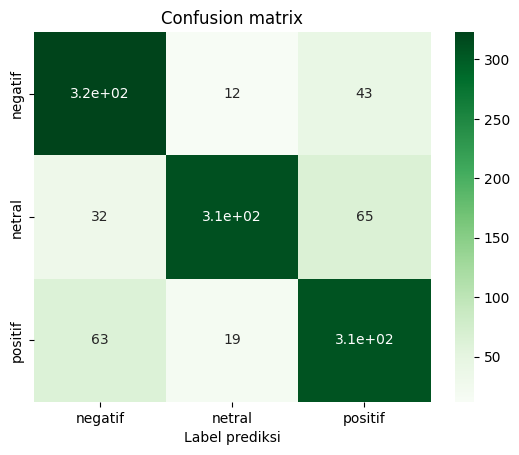

In [36]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame


t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 10 folds
print(scores.mean())

[0.82590234 0.81276596 0.85319149 0.81702128 0.79574468 0.83191489
 0.80851064 0.83617021 0.80851064 0.82553191]
0.8215264037584136


In [38]:
user_data = ["alhamdulillah vaksin apapun itu aman dan baik bagi tubuh kita",
             "vaksin hanyalah bisnis pemerintah dan konspirasi elit global",
             "besok saya dan ibu vaksin di jakarta selatan"]
print(user_data)

['alhamdulillah vaksin apapun itu aman dan baik bagi tubuh kita', 'vaksin hanyalah bisnis pemerintah dan konspirasi elit global', 'besok saya dan ibu vaksin di jakarta selatan']


In [39]:
test_1_unseen =  bow_transformer.transform(user_data)
data=test_1_unseen.toarray()
print("diubah menjadi array: \n ",data)

diubah menjadi array: 
  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
print("ukuran dari array: \n ",data.shape)

ukuran dari array: 
  (3, 11513)


In [41]:
prediction_unseen = model.predict(data)
print(prediction_unseen)

['positif' 'negatif' 'netral']


In [42]:
def load_data():
    data = pd.read_excel('contoh_bersih.xlsx')
    return data

In [43]:
cobahari = load_data()
df = pd.DataFrame(cobahari[['tweet_clean']])
df.head()

,tweet_clean
0,patut syukur indonesia salah baik dian vaksin ...
1,alhamdulilahi rabbil alamin moga vaksinasi lan...
2,cerita ajar riau vaksinasi covid gelar bin jar...
3,dinas sehat dki jakarta antre fasilitas sehat ...
4,tolak vaksin denda juta vaksin nyata bisnis ju...


In [44]:
df.shape

(6, 1)

In [45]:
dokumen = df['tweet_clean']

In [46]:
print(dokumen)

0    patut syukur indonesia salah baik dian vaksin ...
1    alhamdulilahi rabbil alamin moga vaksinasi lan...
2    cerita ajar riau vaksinasi covid gelar bin jar...
3    dinas sehat dki jakarta antre fasilitas sehat ...
4    tolak vaksin denda juta vaksin nyata bisnis ju...
5        dah ngebet jual vaksin makmur sejahtera kroni
Name: tweet_clean, dtype: object


In [47]:
test_1_unseen =  bow_transformer.transform(dokumen)
data=test_1_unseen.toarray()
print("diubah menjadi array: \n ",data)

diubah menjadi array: 
  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
print("ukuran dari array: \n ",data.shape)

ukuran dari array: 
  (6, 11513)


In [49]:
prediction_unseen = model.predict(data)
print(prediction_unseen)

['positif' 'positif' 'netral' 'netral' 'negatif' 'negatif']


In [50]:
df['label_model'] = prediction_unseen

In [51]:
df

,tweet_clean,label_model
0,patut syukur indonesia salah baik dian vaksin ...,positif
1,alhamdulilahi rabbil alamin moga vaksinasi lan...,positif
2,cerita ajar riau vaksinasi covid gelar bin jar...,netral
3,dinas sehat dki jakarta antre fasilitas sehat ...,netral
4,tolak vaksin denda juta vaksin nyata bisnis ju...,negatif
5,dah ngebet jual vaksin makmur sejahtera kroni,negatif


In [52]:
df.to_excel('./contoh_hasilprediksi.xlsx',encoding='utf8', index=True)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
